![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Using Pre-trained Models in Keras**
### **We'll load the weights of advanced pretrained models such as:**

---


1. VGG16
2. ResNet
3. Inception v3
4. MobileNet v2
5. DenseNet201
6. Mobile NASNet 
7. EfficientNetB7

https://keras.io/api/applications/

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')
model.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
!unzip imagesDLCV.zip
!rm rf images/class1/.DS_Store  

Downloading...
From: https://drive.google.com/uc?id=1VyfggIFN2H6cubfh3_yUdicNicZa9sAp
To: /content/images.zip
100% 1.46M/1.46M [00:00<00:00, 95.8MB/s]
Archive:  images.zip
   creating: images/
  inflating: images/.DS_Store        
   creating: images/class1/
  inflating: images/class1/.DS_Store  
  inflating: images/class1/1539714414867.jpg  
  inflating: images/class1/81z6x3SZEpL._AC_SL1500_.jpg  
  inflating: images/class1/Basketball_(Ball).jpg  
  inflating: images/class1/German_Shepherd_-_DSC_0346_(10096362833).jpg  
  inflating: images/class1/christmas-stockings-3006869_1280.jpg  
  inflating: images/class1/download.jpg  
  inflating: images/class1/limo-safety-ftr.jpg  
  inflating: images/class1/long-haired-collie-5766447_1280.jpg  
  inflating: images/class1/spiderweb_1050x700.jpg  
rm: cannot remove 'rf': No such file or directory


In [ ]:
import cv2
from os import listdir
from os.path import isfile, join

# Get images located in ./images folder    
mypath = "./images/class1/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['limo-safety-ftr.jpg',
 'Basketball_(Ball).jpg',
 'long-haired-collie-5766447_1280.jpg',
 'German_Shepherd_-_DSC_0346_(10096362833).jpg',
 'christmas-stockings-3006869_1280.jpg',
 '81z6x3SZEpL._AC_SL1500_.jpg',
 '1539714414867.jpg',
 'spiderweb_1050x700.jpg',
 'download.jpg']

49152/35363 [=========================================] - 0s 0us/step
[('n03670208', 'limousine', 0.9995802), ('n03100240', 'convertible', 0.00018712998), ('n02814533', 'beach_wagon', 7.6703494e-05)]
[('n02802426', 'basketball', 0.9969477), ('n04118538', 'rugby_ball', 0.0012899265), ('n04254680', 'soccer_ball', 0.00047221518)]
[('n02106030', 'collie', 0.8941199), ('n02105855', 'Shetland_sheepdog', 0.10526645), ('n02096294', 'Australian_terrier', 9.2337534e-05)]
[('n02106662', 'German_shepherd', 0.9971667), ('n02105162', 'malinois', 0.0026627106), ('n02096051', 'Airedale', 2.9351557e-05)]
[('n03026506', 'Christmas_stocking', 0.9999466), ('n04254777', 'sock', 3.607213e-05), ('n03775071', 'mitten', 6.3929497e-06)]
[('n03223299', 'doormat', 0.99202615), ('n04599235', 'wool', 0.005080559), ('n02808304', 'bath_towel', 0.0021834006)]
[('n07880968', 'burrito', 0.9866269), ('n07583066', 'guacamole', 0.008800073), ('n07697537', 'hotdog', 0.0020050448)]
[('n04275548', 'spider_web', 0.97702754), (

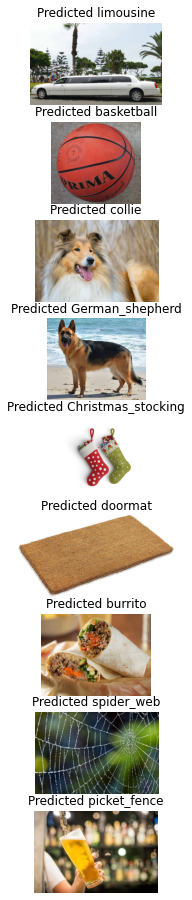

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **2. ResNet50**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
model.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

[('n03670208', 'limousine', 0.9998703), ('n03770679', 'minivan', 5.5406184e-05), ('n02814533', 'beach_wagon', 4.2703174e-05)]
[('n02802426', 'basketball', 1.0), ('n04118538', 'rugby_ball', 4.074248e-11), ('n04023962', 'punching_bag', 1.2545892e-12)]
[('n02106030', 'collie', 0.9782453), ('n02105855', 'Shetland_sheepdog', 0.01976975), ('n02129165', 'lion', 0.0005771974)]
[('n02106662', 'German_shepherd', 0.9995098), ('n02105162', 'malinois', 0.00026146715), ('n02115641', 'dingo', 6.813367e-05)]
[('n03026506', 'Christmas_stocking', 0.99991727), ('n04254777', 'sock', 2.937117e-05), ('n04026417', 'purse', 8.885262e-06)]
[('n03223299', 'doormat', 0.99928004), ('n03530642', 'honeycomb', 0.00021676139), ('n02808304', 'bath_towel', 0.00014457527)]
[('n07880968', 'burrito', 0.999064), ('n07583066', 'guacamole', 0.00046728092), ('n03041632', 'cleaver', 0.00024007725)]
[('n04275548', 'spider_web', 0.9995159), ('n01773797', 'garden_spider', 0.00036489495), ('n01773549', 'barn_spider', 9.7265205e-05

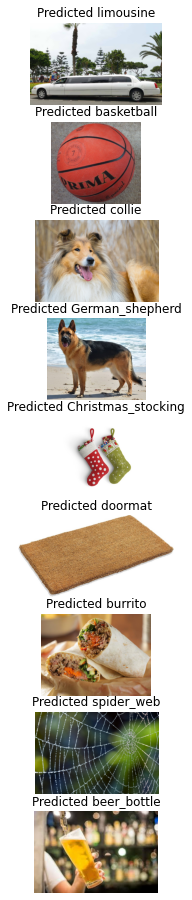

In [ ]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **3. Inception V3**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

model = InceptionV3(weights='imagenet')
model.summary()

96124928/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

[('n03670208', 'limousine', 0.96181005), ('n02917067', 'bullet_train', 0.00025204098), ('n02992529', 'cellular_telephone', 0.0002514693)]
[('n02802426', 'basketball', 0.99989593), ('n01770081', 'harvestman', 3.449915e-06), ('n02279972', 'monarch', 2.4240476e-06)]
[('n02105855', 'Shetland_sheepdog', 0.8346244), ('n02106030', 'collie', 0.12695172), ('n04501370', 'turnstile', 0.00827624)]
[('n02106662', 'German_shepherd', 0.8696459), ('n03803284', 'muzzle', 0.027263151), ('n02091467', 'Norwegian_elkhound', 0.0017647374)]
[('n03026506', 'Christmas_stocking', 0.9989465), ('n04254777', 'sock', 4.0287247e-05), ('n02028035', 'redshank', 3.1300242e-05)]
[('n03223299', 'doormat', 0.949517), ('n04599235', 'wool', 0.002864598), ('n03482405', 'hamper', 0.00079727924)]
[('n07880968', 'burrito', 0.9858155), ('n07697313', 'cheeseburger', 0.00040893583), ('n07583066', 'guacamole', 0.00027678796)]
[('n04275548', 'spider_web', 0.75735724), ('n01773797', 'garden_spider', 0.010265451), ('n04548362', 'walle

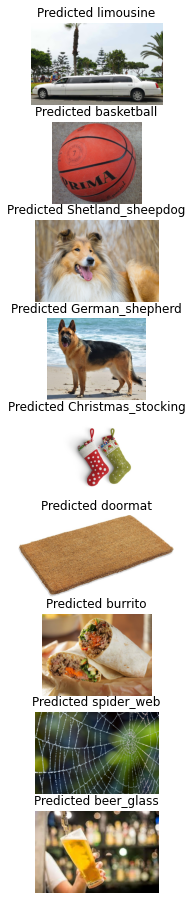

In [ ]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    #note the change in input image size to 299,299
    img = image.load_img(mypath+file, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **4. MobileNet** 

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()

14548992/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

[('n03670208', 'limousine', 0.9699286), ('n03100240', 'convertible', 0.0130735235), ('n04285008', 'sports_car', 0.0016793908)]
[('n02802426', 'basketball', 0.9993199), ('n04118538', 'rugby_ball', 0.0004661835), ('n03134739', 'croquet_ball', 4.2218533e-05)]
[('n02106030', 'collie', 0.8857717), ('n02105855', 'Shetland_sheepdog', 0.070931), ('n02112137', 'chow', 0.0015144558)]
[('n02106662', 'German_shepherd', 0.9584502), ('n02115641', 'dingo', 0.002512966), ('n02105162', 'malinois', 0.002218386)]
[('n03026506', 'Christmas_stocking', 0.8159435), ('n04026417', 'purse', 0.045604993), ('n04254777', 'sock', 0.018345533)]
[('n04548362', 'wallet', 0.5071729), ('n03223299', 'doormat', 0.4650362), ('n04599235', 'wool', 0.0030549034)]
[('n07880968', 'burrito', 0.92595524), ('n07717556', 'butternut_squash', 0.015482456), ('n07697537', 'hotdog', 0.009163951)]
[('n04275548', 'spider_web', 0.7754014), ('n01773797', 'garden_spider', 0.040647775), ('n01773549', 'barn_spider', 0.0388691)]
[('n03888605', 

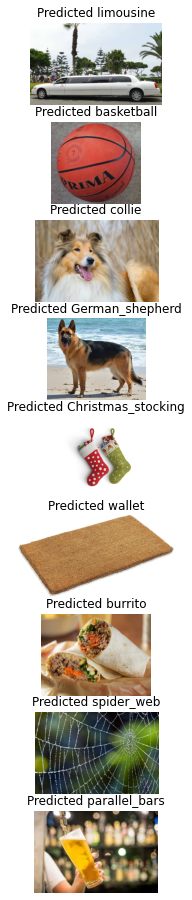

In [ ]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    #from keras.preprocessing import image # Need to reload as opencv2 seems to have a conflict
    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **5. DenseNet201** 

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
import numpy as np

model = DenseNet201(weights='imagenet')
model.summary()

82534400/82524592 [==============================] - 1s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_5[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

[('n03670208', 'limousine', 0.99995506), ('n03100240', 'convertible', 3.466863e-05), ('n02814533', 'beach_wagon', 3.9911283e-06)]
[('n02802426', 'basketball', 0.999987), ('n04118538', 'rugby_ball', 1.145348e-05), ('n04409515', 'tennis_ball', 1.0348389e-06)]
[('n02106030', 'collie', 0.6998315), ('n02105855', 'Shetland_sheepdog', 0.2834308), ('n02129165', 'lion', 0.0063730227)]
[('n02106662', 'German_shepherd', 0.9671915), ('n02115641', 'dingo', 0.0032396857), ('n02105162', 'malinois', 0.0024878934)]
[('n03026506', 'Christmas_stocking', 0.9999522), ('n04254777', 'sock', 3.900052e-05), ('n03908618', 'pencil_box', 4.9371397e-06)]
[('n03223299', 'doormat', 0.99987245), ('n02808304', 'bath_towel', 5.1700972e-05), ('n04599235', 'wool', 3.3841618e-05)]
[('n07880968', 'burrito', 0.99978393), ('n07875152', 'potpie', 8.024698e-05), ('n07871810', 'meat_loaf', 3.2908585e-05)]
[('n04275548', 'spider_web', 0.9788866), ('n01773797', 'garden_spider', 0.009407865), ('n01773157', 'black_and_gold_garden_s

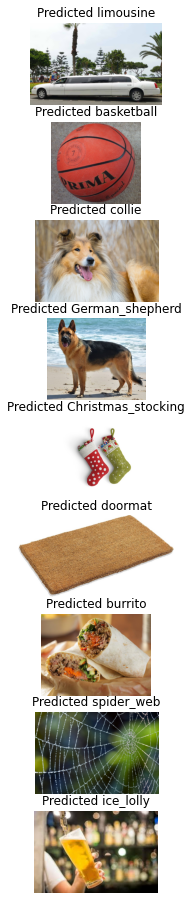

In [ ]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **6. Mobile NASNet** 

In [ ]:
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import preprocess_input
import numpy as np

model = NASNetMobile(weights='imagenet')
model.summary()

24240128/24227760 [==============================] - 0s 0us/step
Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 111, 111, 32  128         ['stem_conv1[0][0]']             
                            

[('n03670208', 'limousine', 0.87118727), ('n03770679', 'minivan', 0.0036812618), ('n03100240', 'convertible', 0.0033958082)]
[('n02802426', 'basketball', 0.9485921), ('n04409515', 'tennis_ball', 0.00062062044), ('n04540053', 'volleyball', 0.0005659931)]
[('n02106030', 'collie', 0.7439815), ('n02105855', 'Shetland_sheepdog', 0.18692005), ('n01735189', 'garter_snake', 0.0008840965)]
[('n02106662', 'German_shepherd', 0.9481418), ('n02105162', 'malinois', 0.0018298416), ('n03803284', 'muzzle', 0.0010404877)]
[('n03026506', 'Christmas_stocking', 0.9471598), ('n03775071', 'mitten', 0.0021202), ('n02786058', 'Band_Aid', 0.00087408314)]
[('n03223299', 'doormat', 0.948002), ('n02786058', 'Band_Aid', 0.008052589), ('n02808304', 'bath_towel', 0.0019397144)]
[('n07880968', 'burrito', 0.95509034), ('n07583066', 'guacamole', 0.0021781072), ('n07873807', 'pizza', 0.000628147)]
[('n04275548', 'spider_web', 0.8747199), ('n01773549', 'barn_spider', 0.018141573), ('n01773797', 'garden_spider', 0.01096834

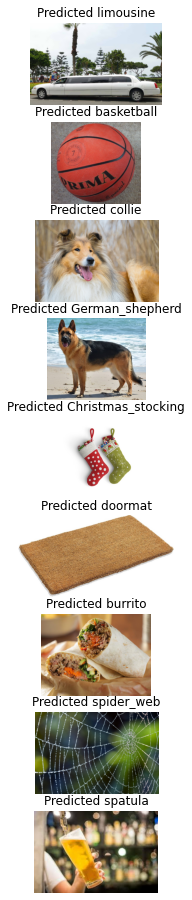

In [ ]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

## **7. EfficientNetB7**

Try other EfficientNets B0 to B7 - https://keras.io/api/applications/efficientnet/

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

model = EfficientNetB7(weights='imagenet')
model.summary()

268337152/268326632 [==============================] - 2s 0us/step
Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 600, 600, 3)  0           ['input_7[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 600, 600, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Ze

[('n03670208', 'limousine', 0.8414073), ('n02814533', 'beach_wagon', 0.00087100605), ('n03770679', 'minivan', 0.00078934117)]
[('n02802426', 'basketball', 0.893544), ('n02190166', 'fly', 0.0006644391), ('n02279972', 'monarch', 0.0005599072)]
[('n02106030', 'collie', 0.70196635), ('n02105855', 'Shetland_sheepdog', 0.07465199), ('n02105251', 'briard', 0.0029647506)]
[('n02106662', 'German_shepherd', 0.77621955), ('n02105162', 'malinois', 0.002116296), ('n03803284', 'muzzle', 0.0018276874)]
[('n03026506', 'Christmas_stocking', 0.83644384), ('n03775071', 'mitten', 0.0028057385), ('n04254777', 'sock', 0.00201251)]
[('n03223299', 'doormat', 0.7074821), ('n04599235', 'wool', 0.0160274), ('n02808304', 'bath_towel', 0.008920557)]
[('n07880968', 'burrito', 0.812096), ('n07583066', 'guacamole', 0.002196176), ('n07875152', 'potpie', 0.001765805)]
[('n04275548', 'spider_web', 0.73734945), ('n01773549', 'barn_spider', 0.05687312), ('n01773797', 'garden_spider', 0.01344945)]
[('n02823750', 'beer_glas

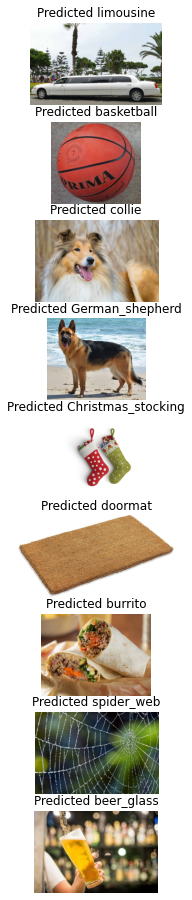

In [ ]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    # Note input size has increased to 600,600
    img = image.load_img(mypath+file, target_size=(600, 600))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()